In [1]:
from bs4 import BeautifulSoup
import requests
url = BeautifulSoup('https://www.worldometers.info/coronavirus/', 'html.parser')
soup = requests.get(url)
soup

C:\Users\Aayush\anaconda3\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


<Response [200]>

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID Live - Coronavirus Statistics - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<!-- Favicon -->
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-ic
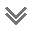

In [2]:

codes = BeautifulSoup(soup.text, "lxml")
codes


In [3]:
table_code = codes.table
table_code

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

In [4]:
tags = table_code.find_all('tr')


In [5]:
list_data = []
for tag in tags:
    x  = tag.text.split('\n')
    if x[1] != '':
        list_data.append(x[1:])
    
list_data

[['#',
  'Country,Other',
  'TotalCases',
  'NewCases',
  'TotalDeaths',
  'NewDeaths',
  'TotalRecovered',
  'NewRecovered',
  'ActiveCases',
  'Serious,Critical',
  'Tot\xa0Cases/1M pop',
  'Deaths/1M pop',
  'TotalTests',
  'Tests/',
  '1M pop',
  '',
  'Population',
  'Continent',
  '1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl',
  'New Cases/1M pop',
  'New Deaths/1M pop',
  'Active Cases/1M pop',
  ''],
 ['1',
  'USA',
  '103,086,927',
  '',
  '1,121,097                                ',
  '',
  '99,979,336',
  '',
  '1,986,494',
  '4,994',
  '307,901',
  '3,349',
  '1,155,456,209',
  '3,451,129',
  '334,805,269 ',
  'North America',
  '',
  '32990',
  '',
  '',
  '5,933',
  ''],
 ['2',
  'India',
  '44,681,170',
  '',
  '530,721                                ',
  '',
  '44,147,002',
  '',
  '3,447',
  '698',
  '31,765',
  '377',
  '911,951,216',
  '648,323',
  '1,406,631,776 ',
  'Asia',
  '',
  '312,6502',
  '',
  '',
  '2',
  ''],
 ['3',
  'France',
  '39,407,727',
  

In [6]:
import csv
file = open('covid.csv','w')
x = csv.writer(file)
x.writerows(list_data)
file.close()

In [7]:
pwd

'C:\\Users\\Aayush\\ClassPython3pm'

In [8]:
import pandas as pd
df = pd.read_csv('covid.csv',encoding = 'latin1')
df

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,Tests/,1M pop,Unnamed: 15,Population,Continent,1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Unnamed: 22
0,1,USA,"103,086,927",NaN,"1,121,097",NaN,"99,979,336",NaN,"1,986,494","4,994",...,"3,451,129","334,805,269",North America,NaN,32990,NaN,NaN,"5,933",NaN,NaN
1,2,India,"44,681,170",NaN,"530,721",NaN,"44,147,002",NaN,"3,447",698,...,"648,323","1,406,631,776",Asia,NaN,"312,6502",NaN,NaN,2,NaN,NaN
2,3,France,"39,407,727",NaN,"162,643",NaN,"38,737,262",NaN,"507,822",869,...,"4,139,547","65,584,518",Europe,NaN,24030,NaN,NaN,"7,743",NaN,NaN
3,4,Germany,"37,509,539",NaN,"162,688",NaN,"36,861,300","+29,500","485,551","1,406",...,"1,458,359","83,883,596",Europe,NaN,25161,NaN,NaN,"5,788",NaN,NaN
4,5,Brazil,"36,504,006",NaN,"694,909",NaN,"35,247,755",NaN,"561,342","8,318",...,"296,146","215,353,593",South America,NaN,63103,NaN,NaN,"2,607",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,227,Vatican City,29,NaN,,NaN,29,NaN,0,NaN,...,NaN,799,Europe,NaN,28,NaN,NaN,NaN,NaN,NaN
227,228,Western Sahara,10,NaN,1,NaN,9,NaN,0,NaN,...,NaN,"626,161",Africa,NaN,"62,616626,161",NaN,NaN,NaN,NaN,NaN
228,229,MS Zaandam,9,NaN,2,NaN,7,NaN,0,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229,230,Tokelau,5,NaN,,NaN,NaN,NaN,5,NaN,...,NaN,"1,378",Australia/Oceania,NaN,276,NaN,NaN,"3,628",NaN,NaN


In [9]:
!pip install plotly==5.11.0

  Attempting uninstall: plotly
    Found existing installation: plotly 5.6.0
    Uninstalling plotly-5.6.0:
      Successfully uninstalled plotly-5.6.0


In [27]:
total_case = list(df['TotalCases'])[0:10]
total_recover = list(df['TotalRecovered'])[0:10]
total_cases =list(map(lambda x:int(x.replace(',','')),total_case))
total_recovered =list(map(lambda x:int(x.replace(',','')),total_recover))

In [20]:
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=df['Country,Other'][0:10], y=total_cases)])
fig.show()

In [21]:
import plotly.graph_objects as go


fig = go.Figure(data=[go.Pie(labels=df['Country,Other'][0:10], values=total_cases)])
fig.show()

In [28]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Total Cases', x=df['Country,Other'][0:10], y=total_cases),
    go.Bar(name='Total Recovered', x=df['Country,Other'][0:10], y=total_recovered)
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()